In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline


SyntaxError: ignored

Reading data:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving arrhythmia (2).csv to arrhythmia (2).csv


Converting to dataframe:

In [ ]:
data = pd.read_csv("arrhythmia (2).csv", header=None, na_values='NaN')
data.columns=range(1, 281) 

In [ ]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,NaN,63.0,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,NaN,53.0,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,NaN,71.0,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,13.0,61.0,3.0,NaN,NaN,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


Splitting the data into training and test data:

In [ ]:
y=data[280]
X=data.drop(280, axis=1)
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

Define a function to measure the error:

In [ ]:
def score_dataset(y_test, x_test, pipeline):
  df_preds=pd.DataFrame((map(round, pipeline.predict(x_test))))
  y_test.index=range(0, len(y_test))
  df_reals=pd.DataFrame(y_test)
  df_reals=df_reals.values.tolist()
  df_preds=df_preds.values.tolist()
  count=0
  for i in range(len(df_preds)):
    if df_preds[i]==df_reals[i]:
      count+=1
  score=(count/len(y_test))*100
  return score

Let's see how model works based on different n_estimators parameter. We use score_dataset function for checking error in percentage.

In [ ]:
scores=['n_estimators', 'error in %']
df_score=pd.DataFrame(index=range(1, 201), columns=scores)
for i in range(1, 201):
  my_pipeline=Pipeline(steps=[('preprocessor', SimpleImputer(strategy='constant', fill_value=0.0)), ('model', RandomForestClassifier(n_estimators=i, random_state=0))])
  my_pipeline.fit(X_train, y_train)
  df_score.loc[i, 'n_estimators']=i
  df_score.loc[i, 'error in %']=score_dataset(y_test, X_test, my_pipeline)

In [ ]:
df_score

,n_estimators,error in %
1,1,41.7582
2,2,52.7473
3,3,65.9341
4,4,62.6374
5,5,67.033
...,...,...
196,196,70.3297
197,197,70.3297
198,198,70.3297
199,199,70.3297


In [ ]:
df_score['n_estimators']=df_score['n_estimators'].astype(int)
df_score['error in %']=df_score['error in %'].astype(float)

Text(0.5, 1.0, 'Dependense accuracy on n_estimators')

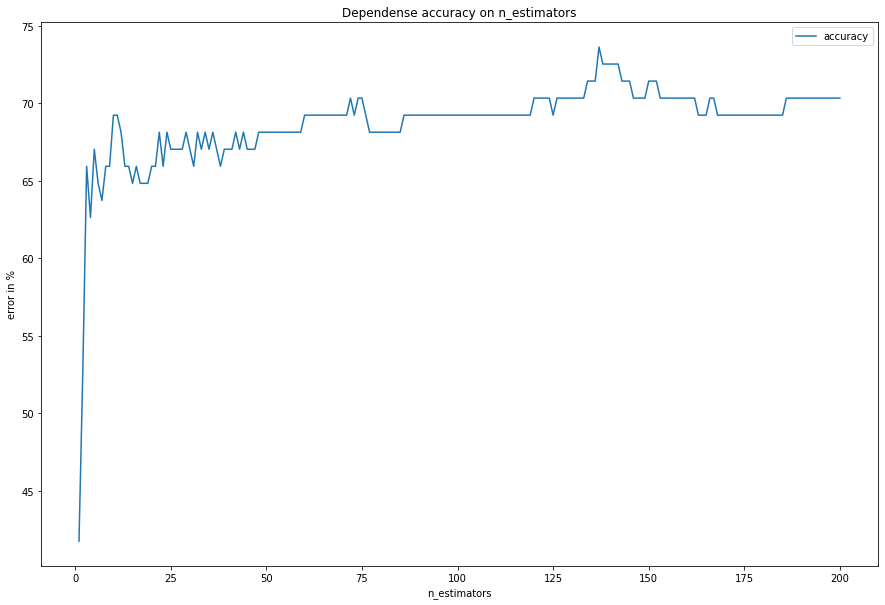

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=df_score['n_estimators'], y=df_score['error in %'], label='accuracy')
plt.title('Dependense accuracy on n_estimators')

Results are not good. Peak value is 73% accuracy with n_estimators from 125 to 150. Perhaps, this is due to the fact that the values of some classes are completely absent, and other ones presented in a small number of values, so some of them may not have entered the training or test data.

Bigger n_estimators also do not show good results.

In [ ]:
scores=['n_estimators', 'error in %']
df_score=pd.DataFrame(index=range(1, 21), columns=scores)
for i in range(50, 1001, 50):
  my_pipeline=Pipeline(steps=[('preprocessor', SimpleImputer(strategy='constant', fill_value=0.0)), ('model', RandomForestClassifier(n_estimators=i, random_state=0))])
  my_pipeline.fit(X_train, y_train)
  df_score.loc[i/50, 'n_estimators']=i
  df_score.loc[i/50, 'error in %']=score_dataset(y_test, X_test, my_pipeline)
df_score['n_estimators']=df_score['n_estimators'].astype(int)
df_score['error in %']=df_score['error in %'].astype(float)

Text(0.5, 1.0, 'Dependense accuracy on n_estimators')

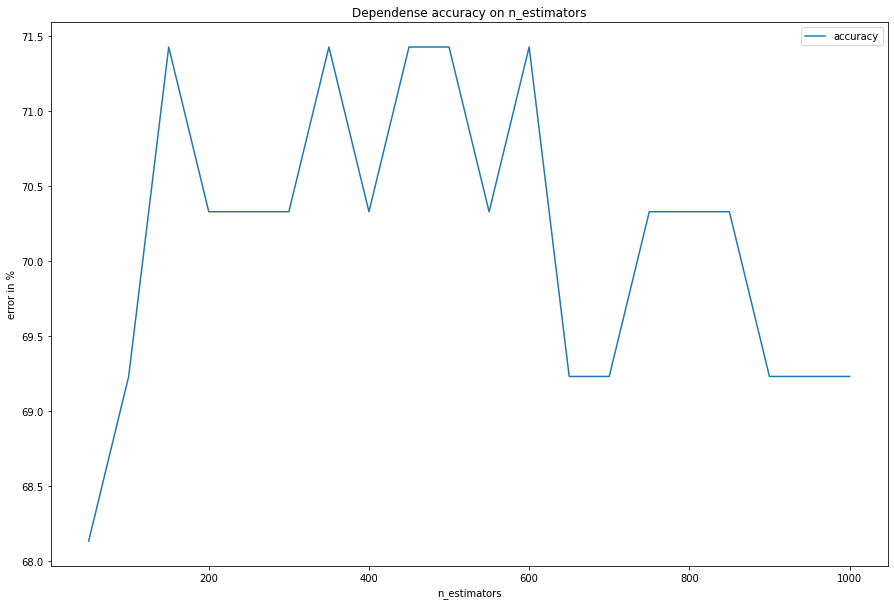

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=df_score['n_estimators'], y=df_score['error in %'], label='accuracy')
plt.title('Dependense accuracy on n_estimators')

It is noteworthy that in task 1 the best results were shown by the division of data in a ratio of 6/4 (possibly due to the specifics of the task itself: you need to recognize 1 or 2 class), while in task 2 the model needs to view more data in order to recognize one of the 14 classes so the 8/2 split performed better than 7/3 or 6/4.